***CHARMI YASHWANT KANANI***

***GO_STP_755***

***Prediction using Supervised Machine Learning using Simple Linear Regression***

In this task we have to find the students scores based on their study hours. This is a simple Regression problem type because it has only two variables. 

# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics

# Loading the data

In [2]:
df = pd.read_csv("/content/StudentHoursScores.csv")
df.head()

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12


# Information about the dataset

In [3]:
df.shape

(23, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   23 non-null     float64
 1   Scores  23 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
print(df.max())
print(df.min())

Hours      9.6
Scores    96.0
dtype: float64
Hours      1.1
Scores    12.0
dtype: float64


In [7]:
df.describe()

,Hours,Scores
count,23.000000,23.000000
mean,4.817391,47.695652
std,2.709688,27.103228
min,1.100000,12.000000
25%,2.650000,27.000000
50%,4.100000,40.000000
75%,7.100000,72.500000
max,9.600000,96.000000


In [8]:
df.nunique()

Hours     22
Scores    22
dtype: int64

# Correlation

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.997656
Scores,0.997656,1.000000


# Mapping the linear relationship

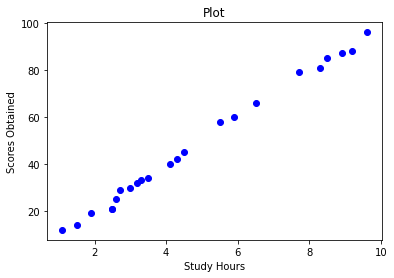

In [10]:
x = df.Hours
y = df.Scores
plt.xlabel('Study Hours')
plt.ylabel('Scores Obtained')
plt.scatter(x,y,color='b',marker= 'o')
plt.title('Plot')
plt.show()

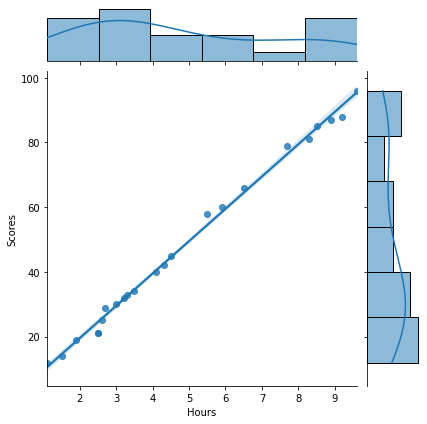

In [11]:
sns.jointplot(data = df, x= 'Hours'	, y = 'Scores', kind = 'reg')

### Splitting into Training and Testing data and assigning the variables

In [12]:
from sklearn.model_selection import train_test_split
X = df[['Hours']]
y = df[['Scores']]

# Building the model

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fitting the model

In [14]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the output for test data

In [15]:
y_pred = lm.predict(X_test)

In [16]:
y_pred

array([[31.59541377],
       [82.13189709],
       [76.18642846],
       [26.64085658],
       [24.65903371],
       [14.74991933],
       [58.35002259]])

In [17]:
# For any random value
lm.predict([[10]])

array([[98.97739153]])

In [18]:
# Coefficient of the independent variable
lm.coef_

array([[9.90911438]])

In [19]:
# Intercept of the model
lm.intercept_

array([-0.11375223])

# Model Evaluation

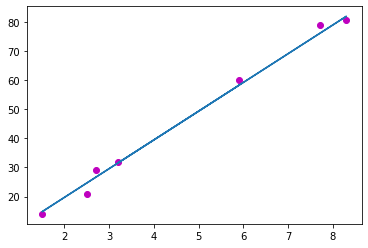

In [20]:
plt.scatter(X_test,y_test, color = 'm')
plt.plot(X_test,lm.predict(X_test))
plt.show()

# R2 Score

In [21]:
sklearn.metrics.r2_score(y_test, y_pred)

0.9931879868985266

In [22]:
metrics.mean_absolute_error(y_test,y_pred)

1.8240183891656307

# RMSE

In [23]:
metrics.mean_squared_error(y_test,y_pred)

4.514279376143736

In [24]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

2.1246833590311134

# Pickle

In [25]:
import pickle 

# Saving the model
with open('modelsave_pickle','wb') as file: 
  pickle.dump(lm, file)

# Loading the model 
with open('modelsave_pickle', 'rb') as file:
  newmodel = pickle.load(file)

# Predicting for a value 
newmodel.predict([[5]])

array([[49.43181965]])

# Joblib

In [26]:
# Importing the package and saving it
from sklearn.externals import joblib
joblib.dump(lm,'model_joblib')

# Loading the model
loaded_model = joblib.load('model_joblib')

# Predicting for a value
loaded_model.predict([[5]])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


array([[49.43181965]])